In [1]:
### Importamos las librerías a usar ###
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# instanciamos la librería Sklearn para la regresión lineal #
from sklearn.linear_model import LinearRegression
# instancia para graficar #
from seaborn import load_dataset
from sklearn import preprocessing

In [2]:
### importamos los datos ###
datos = pd.read_csv('clientesSeg.csv')

In [3]:
# visualizamos tabla #
datos.head()

,Cliente,Genero,Edad,GastoR($),GastoI($),GastoM($)
0,Juan Carlos,Masculino,19,15,39,2.60
1,Jose,Masculino,21,15,81,5.40
2,Maria,Femenino,20,16,6,0.38
3,Rosa,Femenino,23,16,77,4.81
4,Maria Esther,Femenino,31,17,40,2.35


In [4]:
### Analizamos los datos ###
print('Información del Dataset')
print(datos.info())
print('**********************************************************')
print('Descripción del Dataset')
print(datos.describe())
print('**********************************************************')
print('Distribución de Dataset')
print(datos.groupby('Cliente').size())
print()

Información del Dataset
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Cliente    200 non-null    object 
 1   Genero     200 non-null    object 
 2   Edad       200 non-null    int64  
 3   GastoR($)  200 non-null    int64  
 4   GastoI($)  200 non-null    int64  
 5   GastoM($)  200 non-null    float64
dtypes: float64(1), int64(3), object(2)
memory usage: 9.5+ KB
None
**********************************************************
Descripción del Dataset
             Edad   GastoR($)   GastoI($)   GastoM($)
count  200.000000  200.000000  200.000000  200.000000
mean    38.850000   60.560000   50.200000    1.068700
std     13.969007   26.264721   25.823522    0.973295
min     18.000000   15.000000    1.000000    0.010000
25%     28.750000   41.500000   34.750000    0.632500
50%     36.000000   61.500000   50.000000    0.890000
75%     49.000000   78.0

In [5]:
# Comprobamos la presencia de datos nulos #
is_Null = pd.isnull(datos)
is_Null

,Cliente,Genero,Edad,GastoR($),GastoI($),GastoM($)
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,False,False,False,False,False
...,...,...,...,...,...,...
195,False,False,False,False,False,False
196,False,False,False,False,False,False
197,False,False,False,False,False,False
198,False,False,False,False,False,False


Gráfico de pastel del género


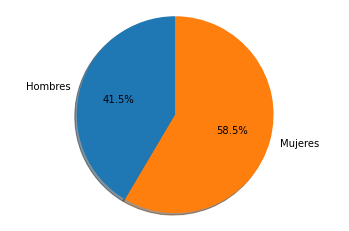

In [6]:
### Visualizamos los datos ###
# Visualizar datos de Clientes masculinos y femeninos #
print('Gráfico de pastel del género')
labels = 'Hombres', 'Mujeres'
sizes = [len(datos[datos['Genero'] == "Masculino"]), len(datos[datos['Genero'] == "Femenino"])]
explode = (0,0)

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
       shadow=True, startangle=90)
ax1.axis('equal')

plt.show()

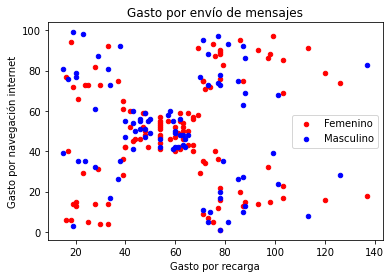

In [7]:
# Visualización con datos matplotlib #
fig = datos[datos.Genero == 'Femenino'].plot(kind='scatter', x = 'GastoR($)', y = 'GastoI($)', color = 'red', label='Femenino')
datos[datos.Genero == 'Masculino'].plot(kind='scatter', x = 'GastoR($)', y = 'GastoI($)', color = 'blue', label='Masculino', ax=fig)
fig.set_xlabel('Gasto por recarga')
fig.set_ylabel('Gasto por navegación internet')
fig.set_title('Gasto por envío de mensajes')
plt.show()

In [8]:
# Visualizar datos de: #
# - términos de dinero gastado en recargas #
# - envío de mensajes #
# - navegación por internet #

#se separan los datos por categorías#
datos_masculinos = datos[datos['Genero'] == 'Masculino']
datos_masculinos.drop(['Cliente'],1)
datos_femeninos = datos[datos['Genero'] == 'Femenino']
datos_femeninos.drop(['Cliente'],1)

,Genero,Edad,GastoR($),GastoI($),GastoM($)
2,Femenino,20,16,6,0.38
3,Femenino,23,16,77,4.81
4,Femenino,31,17,40,2.35
6,Femenino,35,18,6,0.33
7,Femenino,23,18,94,5.22
...,...,...,...,...,...
193,Femenino,38,113,91,0.81
194,Femenino,47,120,16,0.13
195,Femenino,35,120,79,0.66
197,Femenino,32,126,74,0.59


In [9]:
# agrupamos por edades y normalizamos #

#Primera Categoría#
datos_f_edad = datos_femeninos.groupby(['Edad']).mean()
escala = preprocessing.MinMaxScaler()
datos_femeninos_mm = escala.fit_transform(datos_f_edad)
datos_femeninos_mm = pd.DataFrame(datos_femeninos_mm, columns=datos_f_edad.columns)
datos_femeninos_mm.index = datos_f_edad.index

#Segunda Categoría#
datos_m_edad = datos_masculinos.groupby(['Edad']).mean()
escala = preprocessing.MinMaxScaler()
datos_masculinos_mm = escala.fit_transform(datos_m_edad)
datos_masculinos_mm = pd.DataFrame(datos_masculinos_mm, columns=datos_m_edad.columns)
datos_masculinos_mm.index = datos_m_edad.index

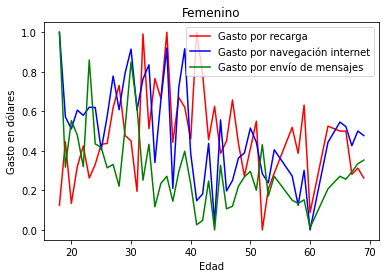

In [10]:
# graficamos la primera categoría #
plt.plot(datos_femeninos_mm.index,datos_femeninos_mm['GastoR($)'], color='r', label = 'Gasto por recarga')
plt.plot(datos_femeninos_mm.index,datos_femeninos_mm['GastoI($)'], color='b',label = 'Gasto por navegación internet')
plt.plot(datos_femeninos_mm.index,datos_femeninos_mm['GastoM($)'], color='g',label = 'Gasto por envío de mensajes')
plt.xlabel('Edad')
plt.ylabel('Gasto en dólares')
plt.title('Femenino')
plt.legend()
plt.show()

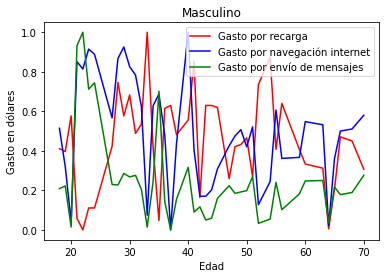

In [11]:
# graficamos la segunda categoría #
plt.plot(datos_masculinos_mm.index,datos_masculinos_mm['GastoR($)'], color='r', label = 'Gasto por recarga')
plt.plot(datos_masculinos_mm.index,datos_masculinos_mm['GastoI($)'], color='b',label = 'Gasto por navegación internet')
plt.plot(datos_masculinos_mm.index,datos_masculinos_mm['GastoM($)'], color='g',label = 'Gasto por envío de mensajes')
plt.xlabel('Edad')
plt.ylabel('Gasto en dólares')
plt.title('Masculino')
plt.legend()
plt.show()

In [12]:
### Importación de Machine Learning ###
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier 

# Importación de KMeans#
from sklearn.cluster import KMeans

In [13]:
# Transformamos todos los datos a valores numericos#
genero_num = datos.replace(['Masculino','Femenino'],[0,1])
# Borramos los datos que no nos sirven #
nuevos_datos = genero_num.drop(['Cliente'],axis=1)
nuevos_datos

,Genero,Edad,GastoR($),GastoI($),GastoM($)
0,0,19,15,39,2.60
1,0,21,15,81,5.40
2,1,20,16,6,0.38
3,1,23,16,77,4.81
4,1,31,17,40,2.35
...,...,...,...,...,...
195,1,35,120,79,0.66
196,0,45,126,28,0.22
197,1,32,126,74,0.59
198,1,32,137,18,0.13


In [14]:
# normalizar datos #
datos_normalizados = (nuevos_datos - nuevos_datos.min())/(nuevos_datos.max() - nuevos_datos.min())
datos_normalizados.describe()

,Genero,Edad,GastoR($),GastoI($),GastoM($)
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,0.585000,0.400962,0.373443,0.502041,0.196419
std,0.493958,0.268635,0.215285,0.263505,0.180574
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.206731,0.217213,0.344388,0.115492
50%,1.000000,0.346154,0.381148,0.500000,0.163265
75%,1.000000,0.596154,0.516393,0.734694,0.208256
max,1.000000,1.000000,1.000000,1.000000,1.000000


In [15]:
# Creamos diferentes clusters#
from sklearn.cluster import KMeans

In [16]:
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i, max_iter=300)
    kmeans.fit(datos_normalizados)
    wcss.append(kmeans.inertia_)

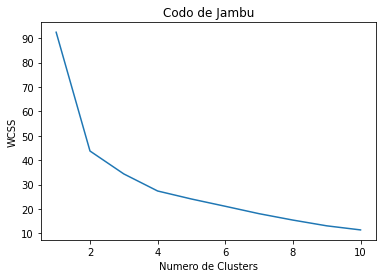

In [17]:
# GRÁFICAMOS EL COD DE YAMBU (ALGORITMO)
plt.plot(range(1,11), wcss)
plt.title("Codo de Jambu")
plt.xlabel("Numero de Clusters")
plt.ylabel("WCSS")
plt.show()

In [18]:
# CÁLCULO DE KMEANS CON EL NÚMERO DE CLUSTER ÓPTIMOS #
kmeans = KMeans(n_clusters=2, max_iter=300)
kmeans.fit(datos_normalizados)
datos['cluster'] = kmeans.labels_
centroides = kmeans.cluster_centers_
centroides

array([[-7.77156117e-16,  3.94578313e-01,  3.65889789e-01,
         5.17334645e-01,  2.17649820e-01],
       [ 1.00000000e+00,  4.05489809e-01,  3.78800617e-01,
         4.91191348e-01,  1.81358324e-01]])

In [19]:
# VEMOS LAS ETIQUETAS #
kmeans.labels_

array([0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1,
       1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1,
       0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0,
       1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1,
       1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1,
       1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0,
       1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1,
       1, 0])

In [20]:
# CREO LA COLUMNA KMEANS_CLUSTERS #
datos_normalizados['Kmeans_Clusters'] = kmeans.labels_
datos_n_component = datos_normalizados
# Visualización de últimos registros #
datos_normalizados.head(5)

,Genero,Edad,GastoR($),GastoI($),GastoM($),Kmeans_Clusters
0,0.0,0.019231,0.000000,0.387755,0.480519,0
1,0.0,0.057692,0.000000,0.816327,1.000000,0
2,1.0,0.038462,0.008197,0.051020,0.068646,1
3,1.0,0.096154,0.008197,0.775510,0.890538,1
4,1.0,0.250000,0.016393,0.397959,0.434137,1


In [21]:
from sklearn.decomposition import PCA

In [22]:
# REDUZCO LA DIMENCIONALIDAD A DOS #
pca = PCA(n_components=2)
pca_datos = pca.fit_transform(datos_normalizados)
pca_datos_df = pd.DataFrame(data=pca_datos, columns=['componente_1', 'componente_2'])
pca_datos_df

,componente_1,componente_2
0,0.841002,0.292244
1,0.866423,0.766616
2,-0.592727,-0.061127
3,-0.551351,0.722177
4,-0.575956,0.189311
...,...,...
195,-0.586322,0.166242
196,0.808894,-0.388866
197,-0.587846,0.155633
198,-0.605222,-0.271081


In [23]:
pca_datos_df['Kmeans_Clusters'] = kmeans.labels_
pca_datos_df

,componente_1,componente_2,Kmeans_Clusters
0,0.841002,0.292244,0
1,0.866423,0.766616,0
2,-0.592727,-0.061127,1
3,-0.551351,0.722177,1
4,-0.575956,0.189311,1
...,...,...,...
195,-0.586322,0.166242,1
196,0.808894,-0.388866,0
197,-0.587846,0.155633,1
198,-0.605222,-0.271081,1


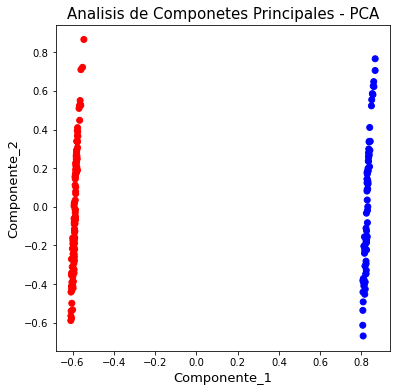

In [24]:
### GRÁFICAR LOS DATOS
fig = plt.figure(figsize = (6,6))
ax = fig.add_subplot(1,1,1)
ax.set_xlabel('Componente_1', fontsize=13)
ax.set_ylabel('Componente_2', fontsize=13)
ax.set_title('Analisis de Componetes Principales - PCA', fontsize=15)
color = np.array(['blue','red','green'])
ax.scatter(x = pca_datos_df.componente_1, y = pca_datos_df.componente_2, c = color[pca_datos_df.Kmeans_Clusters])
plt.show()

In [25]:
from sklearn.metrics import silhouette_score
datos_n_component = datos_n_component.drop(['Kmeans_Clusters'],axis=1)
datos_n_component
silhouette_score(datos_n_component, labels=kmeans.predict(datos_n_component))

0.49319143299544277

In [26]:
### GRABO LOS RESULTADOS A UN NUEVO ARCHIVO ###
datos.to_excel('segmentacionDeClientes_cluster.xlsx')

In [27]:
## LEEMOS EL NUEVO ARCHIVO
datos_nuevos = pd.read_excel('segmentacionDeClientes_cluster.xlsx')
datos_nuevos.head(5)

,Unnamed: 0,Cliente,Genero,Edad,GastoR($),GastoI($),GastoM($),cluster
0,0,Juan Carlos,Masculino,19,15,39,2.60,0
1,1,Jose,Masculino,21,15,81,5.40,0
2,2,Maria,Femenino,20,16,6,0.38,1
3,3,Rosa,Femenino,23,16,77,4.81,1
4,4,Maria Esther,Femenino,31,17,40,2.35,1
